In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [23]:
data = pd.read_csv('Salary_data.csv')

In [24]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


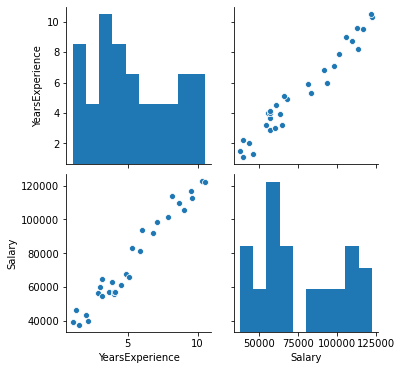

In [25]:
sns.pairplot(data)

In [27]:
X = data.iloc[:,:-1].values

In [28]:
import scipy.cluster.hierarchy as sch

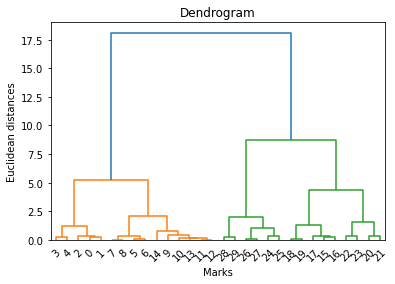

In [29]:
dend= sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Employees')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [31]:
y_hc = hc.fit_predict(X)
y_hc

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2], dtype=int64)

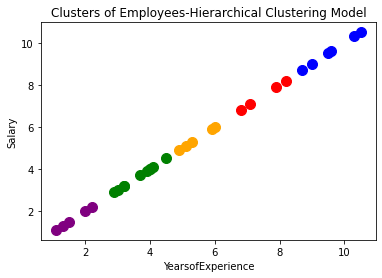

In [35]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,0],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,0],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,0],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,0],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,0],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Employees-Hierarchical Clustering Model')
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
plt.show()


In [36]:
#Text analysis
papers  = pd.read_csv('testdata.csv')

In [38]:
papers.head()

,category,text
0,science,"He estimates that 1,000-micrometer pellets cou..."
1,science,“That’s enough time to potentially get to Mars...
2,science,How exactly clumps of microbes might get expel...
3,science,The microbes might get kicked up by small mete...
4,science,"Someday, if microbial life is ever discovered ..."


In [39]:
papers.describe()

,category,text
count,20,20
unique,4,20
top,covid,The fact is that some customers are just plain...
freq,5,1


In [41]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  20 non-null     object
 1   text      20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [42]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.  Downloading smart_open-6.1.0-py3-none-any.whl (58 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21



In [44]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [47]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]



data_words = list(sent_to_words(data))

In [48]:
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['yearsexperience']


In [49]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1)]


In [50]:
#LDA Model Training
from pprint import pprint
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.917*"salary" + 0.083*"yearsexperience"'),
 (1, '0.500*"salary" + 0.500*"yearsexperience"'),
 (2, '0.500*"yearsexperience" + 0.500*"salary"'),
 (3, '0.500*"salary" + 0.500*"yearsexperience"'),
 (4, '0.500*"salary" + 0.500*"yearsexperience"'),
 (5, '0.500*"yearsexperience" + 0.500*"salary"'),
 (6, '0.500*"yearsexperience" + 0.500*"salary"'),
 (7, '0.917*"yearsexperience" + 0.083*"salary"'),
 (8, '0.500*"salary" + 0.500*"yearsexperience"'),
 (9, '0.500*"salary" + 0.500*"yearsexperience"')]


In [51]:
pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=dd313d138cb55e29f6883a795431fe07d8aba5e2a43d54806add03bd703a3f24
  Stored in directory: c:\users\sanjana\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=82965c01aedc9c36549e500e58311a84d92cdae657c59e6166608f7d775a4219
  Stored in directory: c:\users\sanjana\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successf

In [52]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [53]:
pyLDAvis.enable_notebook()